In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
filename = '../../data/processed/reshaped.csv'
df = pd.read_csv(filename)
df.head()

,zipcode,year_1_EQI_MSA,year_1_EQI_state,year_1_EQI_zip,year_1_RECPI_MSA,year_1_RECPI_state,year_1_RECPI_zip,year_1_SFR_MSA,year_1_SFR_state,year_1_SFR_zip,...,year_5_EQI_MSA,year_5_EQI_state,year_5_EQI_zip,year_5_RECPI_MSA,year_5_RECPI_state,year_5_RECPI_zip,year_5_SFR_MSA,year_5_SFR_state,year_5_SFR_zip,avg_eqi_year_5-10
0,94105,0.004069,0.001958,0.010818,84.499120,305.42075,4.846636,20765.0,156007.0,448.0,...,0.004237,0.002034,0.013610,117.379170,424.64432,6.491804,27702.0,208750.0,477.0,0.011760
1,94105,0.003005,0.001728,0.004916,62.051678,295.80084,2.168169,20650.0,171222.0,441.0,...,0.004088,0.002008,0.009089,77.860010,289.82947,4.617430,19046.0,144312.0,508.0,0.006396
2,94105,0.002852,0.001878,0.003977,39.292477,220.55566,0.867056,13776.0,117462.0,218.0,...,0.002713,0.001678,0.006451,53.489998,279.81754,2.432106,19717.0,166796.0,377.0,0.005360
3,94105,0.002967,0.002179,0.005334,29.351414,148.66182,1.098702,9893.0,68229.0,206.0,...,0.003050,0.002141,0.006169,39.236168,218.55038,1.640921,12864.0,102099.0,266.0,0.008573
4,94105,0.002321,0.001897,0.002985,12.946106,78.22849,0.304480,5577.0,41245.0,102.0,...,0.002861,0.002174,0.004034,23.975395,130.29242,0.746225,8380.0,59931.0,185.0,0.002920


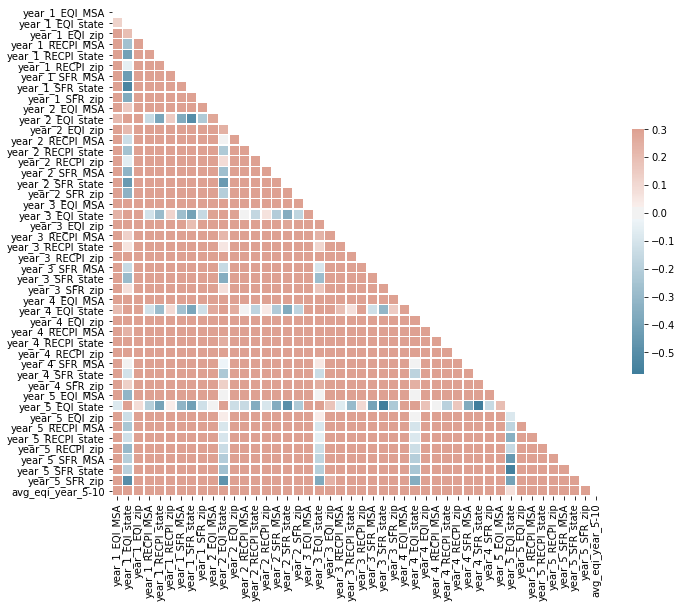

In [64]:
# Compute the correlation matrix
corr = df.drop(['zipcode','start_year'], axis=1).corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [65]:
corr['avg_eqi_year_5-10'].drop(['avg_eqi_year_5-10']).sort_values(ascending=True)

year_5_EQI_state      0.074951
year_1_EQI_state      0.395227
year_2_EQI_state      0.443259
year_4_EQI_state      0.490877
year_3_EQI_state      0.513514
year_1_SFR_state      0.516008
year_5_SFR_zip        0.547341
year_2_SFR_state      0.599565
year_1_SFR_MSA        0.632380
year_1_RECPI_state    0.635457
year_5_EQI_MSA        0.660407
year_3_SFR_state      0.663242
year_1_SFR_zip        0.684725
year_5_SFR_state      0.710847
year_2_SFR_MSA        0.724207
year_2_SFR_zip        0.734199
year_4_SFR_state      0.736740
year_5_SFR_MSA        0.750942
year_5_RECPI_zip      0.754378
year_2_RECPI_state    0.761667
year_1_RECPI_MSA      0.779791
year_5_RECPI_MSA      0.790488
year_3_SFR_MSA        0.802462
year_5_RECPI_state    0.828544
year_2_RECPI_MSA      0.842311
year_5_EQI_zip        0.850843
year_1_RECPI_zip      0.861851
year_2_RECPI_zip      0.863371
year_4_SFR_MSA        0.868514
year_3_RECPI_state    0.903403
year_3_EQI_zip        0.911883
year_3_SFR_zip        0.928058
year_1_E

In [66]:
df = df[df.columns.drop(list(df.filter(regex='SFR')))]

In [67]:
df['eqi_zip_abs_change'] = df.apply(lambda row: row.year_5_EQI_zip - row.year_1_EQI_zip, axis=1)
df['recpi_zip_abs_change'] = df.apply(lambda row: row.year_5_RECPI_zip - row.year_1_RECPI_zip, axis=1)
df['eqi_zip_pct_change'] = df.apply(lambda row: row.year_5_EQI_zip / row.year_1_EQI_zip, axis=1)
df['recpi_zip_pct_change'] = df.apply(lambda row: row.year_5_RECPI_zip / row.year_1_RECPI_zip, axis=1)

In [68]:
df['eqi_zip_change_1'] = df.apply(lambda row: row.year_2_EQI_zip / row.year_1_EQI_zip, axis=1)
df['eqi_zip_change_2'] = df.apply(lambda row: row.year_3_EQI_zip / row.year_2_EQI_zip, axis=1)
df['eqi_zip_change_3'] = df.apply(lambda row: row.year_4_EQI_zip / row.year_3_EQI_zip, axis=1)
df['eqi_zip_change_4'] = df.apply(lambda row: row.year_5_EQI_zip / row.year_4_EQI_zip, axis=1)

In [69]:
df['eqi_msa_change_1'] = df.apply(lambda row: row.year_2_EQI_MSA / row.year_1_EQI_MSA, axis=1)
df['eqi_msa_change_2'] = df.apply(lambda row: row.year_3_EQI_MSA / row.year_2_EQI_MSA, axis=1)
df['eqi_msa_change_3'] = df.apply(lambda row: row.year_4_EQI_MSA / row.year_3_EQI_MSA, axis=1)
df['eqi_msa_change_4'] = df.apply(lambda row: row.year_5_EQI_MSA / row.year_4_EQI_MSA, axis=1)

In [70]:
df['eqi_state_change_1'] = df.apply(lambda row: row.year_2_EQI_state / row.year_1_EQI_state, axis=1)
df['eqi_state_change_2'] = df.apply(lambda row: row.year_3_EQI_state / row.year_2_EQI_state, axis=1)
df['eqi_state_change_3'] = df.apply(lambda row: row.year_4_EQI_state / row.year_3_EQI_state, axis=1)
df['eqi_state_change_4'] = df.apply(lambda row: row.year_5_EQI_state / row.year_4_EQI_state, axis=1)

In [71]:
df['recpi_zip_change_1'] = df.apply(lambda row: row.year_2_RECPI_zip / row.year_1_RECPI_zip, axis=1)
df['recpi_zip_change_2'] = df.apply(lambda row: row.year_3_RECPI_zip / row.year_2_RECPI_zip, axis=1)
df['recpi_zip_change_3'] = df.apply(lambda row: row.year_4_RECPI_zip / row.year_3_RECPI_zip, axis=1)
df['recpi_zip_change_4'] = df.apply(lambda row: row.year_5_RECPI_zip / row.year_4_RECPI_zip, axis=1)

In [72]:
df['recpi_msa_change_1'] = df.apply(lambda row: row.year_2_RECPI_MSA / row.year_1_RECPI_MSA, axis=1)
df['recpi_msa_change_2'] = df.apply(lambda row: row.year_3_RECPI_MSA / row.year_2_RECPI_MSA, axis=1)
df['recpi_msa_change_3'] = df.apply(lambda row: row.year_4_RECPI_MSA / row.year_3_RECPI_MSA, axis=1)
df['recpi_msa_change_4'] = df.apply(lambda row: row.year_5_RECPI_MSA / row.year_4_RECPI_MSA, axis=1)

In [73]:
df['recpi_state_change_1'] = df.apply(lambda row: row.year_2_RECPI_state / row.year_1_RECPI_state, axis=1)
df['recpi_state_change_2'] = df.apply(lambda row: row.year_3_RECPI_state / row.year_2_RECPI_state, axis=1)
df['recpi_state_change_3'] = df.apply(lambda row: row.year_4_RECPI_state / row.year_3_RECPI_state, axis=1)
df['recpi_state_change_4'] = df.apply(lambda row: row.year_5_RECPI_state / row.year_4_RECPI_state, axis=1)

In [74]:
df['avg_eqi_year_1-5'] = df.apply(lambda row: ((row.year_1_EQI_zip + row.year_2_EQI_zip + row.year_3_EQI_zip + row.year_4_EQI_zip + row.year_5_EQI_zip)/5), axis=1)

In [75]:
# Compute new correlation matrix
corr = df.drop(['zipcode','start_year'], axis=1).corr()

In [76]:
corr['avg_eqi_year_5-10'].drop(['avg_eqi_year_5-10']).sort_values(ascending=True)

recpi_zip_pct_change   -0.860837
recpi_zip_change_4     -0.724956
eqi_zip_change_4       -0.673825
recpi_msa_change_4     -0.657544
eqi_msa_change_4       -0.636847
recpi_state_change_4   -0.636489
eqi_state_change_4     -0.635416
recpi_zip_change_1     -0.489533
eqi_zip_pct_change     -0.394054
eqi_zip_change_1       -0.227239
year_5_EQI_state        0.074951
eqi_msa_change_2        0.152478
recpi_zip_change_3      0.182823
eqi_state_change_3      0.184652
eqi_msa_change_3        0.200917
recpi_msa_change_2      0.201560
recpi_state_change_1    0.201843
eqi_zip_abs_change      0.203291
recpi_state_change_3    0.215024
recpi_msa_change_3      0.215099
eqi_state_change_1      0.244629
recpi_zip_abs_change    0.251238
recpi_zip_change_2      0.346204
year_1_EQI_state        0.395227
recpi_state_change_2    0.416131
year_2_EQI_state        0.443259
eqi_zip_change_3        0.444121
eqi_zip_change_2        0.447892
year_4_EQI_state        0.490877
year_3_EQI_state        0.513514
eqi_state_

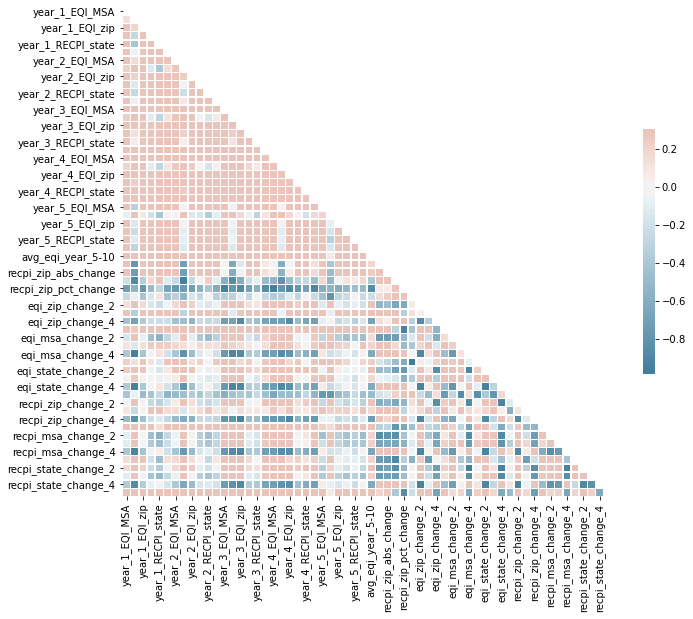

In [77]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [78]:
df.head()

,zipcode,year_1_EQI_MSA,year_1_EQI_state,year_1_EQI_zip,year_1_RECPI_MSA,year_1_RECPI_state,year_1_RECPI_zip,start_year,year_2_EQI_MSA,year_2_EQI_state,...,recpi_zip_change_4,recpi_msa_change_1,recpi_msa_change_2,recpi_msa_change_3,recpi_msa_change_4,recpi_state_change_1,recpi_state_change_2,recpi_state_change_3,recpi_state_change_4,avg_eqi_year_1-5
0,94105,0.004069,0.001958,0.010818,84.499120,305.42075,4.846636,2012.0,0.004284,0.002042,...,0.912531,1.164990,1.168154,1.148874,0.888473,1.129904,1.153290,1.111117,0.960256,0.011760
1,94105,0.003005,0.001728,0.004916,62.051678,295.80084,2.168169,2007.0,0.002955,0.001725,...,1.540061,0.898465,0.929362,1.138522,1.319877,0.907597,0.888780,1.048553,1.158418,0.006396
2,94105,0.002852,0.001878,0.003977,39.292477,220.55566,0.867056,2002.0,0.002594,0.001715,...,1.268524,0.989648,1.137772,1.099402,1.099690,1.013567,1.104955,1.096684,1.032946,0.005360
3,94105,0.002967,0.002179,0.005334,29.351414,148.66182,1.098702,1997.0,0.002943,0.002179,...,0.307269,1.044544,1.638023,1.363157,0.573146,1.082348,1.373139,1.395414,0.708871,0.008573
4,94105,0.002321,0.001897,0.002985,12.946106,78.22849,0.304480,1992.0,0.002108,0.001978,...,1.881157,0.996385,1.225343,1.180030,1.285431,1.129189,1.057555,1.139301,1.224183,0.002920


In [79]:
path = '../../data/processed/feature-eng.csv'
df.to_csv(path, index=False)